In [60]:
# !pip install Sastrawi
# !pip install swifter
import pandas as pd
import numpy as np
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn import svm

# import dataset

In [61]:
#jangan lupa kolom content di ganti Ulasan dan kolom Label di ganti Sentimen
ulasan = pd.read_csv('datasetbaru.csv')
ulasan


,No,Username,Score,At,Ulasan,Sentimen
0,1,Hapix Putra,5,Tue 31 Jan 2023 12:45:23 GMT,oo di,positive
1,2,Grace Cipto,5,Tue 31 Jan 2023 04:52:03 GMT,bagus sih tapi tingkatkan lagi,positive
2,3,Ema Akmaliah,5,Mon 30 Jan 2023 22:52:38 GMT,lebih mudah lebih cepat dlm pelayanan,positive
3,4,Prasetyo Utomo,5,Mon 30 Jan 2023 13:00:54 GMT,pilihannya keren,positive
4,5,Bayu Iryanto,5,Mon 30 Jan 2023 09:38:02 GMT,terbaek,positive
...,...,...,...,...,...,...
976,996,Yebee Glory christiant,5,Fri 14 Oct 2022 09:13:09 GMT,mantap cepat dan terpercaya,positive
977,997,Danny Purba,5,Thu 13 Oct 2022 18:50:40 GMT,aplikasi sangat membantu pembelian tiket,neutral
978,998,Nabil Syujazaidan,4,Thu 13 Oct 2022 16:51:45 GMT,jam brp sekarang,neutral
979,999,dewa pandhu,5,Thu 13 Oct 2022 15:36:20 GMT,memudahkan pemesanan tiket bioskop,positive


In [62]:
ulasan[['Username', 'Ulasan', 'At']]

,Username,Ulasan,At
0,Hapix Putra,oo di,Tue 31 Jan 2023 12:45:23 GMT
1,Grace Cipto,bagus sih tapi tingkatkan lagi,Tue 31 Jan 2023 04:52:03 GMT
2,Ema Akmaliah,lebih mudah lebih cepat dlm pelayanan,Mon 30 Jan 2023 22:52:38 GMT
3,Prasetyo Utomo,pilihannya keren,Mon 30 Jan 2023 13:00:54 GMT
4,Bayu Iryanto,terbaek,Mon 30 Jan 2023 09:38:02 GMT
...,...,...,...
976,Yebee Glory christiant,mantap cepat dan terpercaya,Fri 14 Oct 2022 09:13:09 GMT
977,Danny Purba,aplikasi sangat membantu pembelian tiket,Thu 13 Oct 2022 18:50:40 GMT
978,Nabil Syujazaidan,jam brp sekarang,Thu 13 Oct 2022 16:51:45 GMT
979,dewa pandhu,memudahkan pemesanan tiket bioskop,Thu 13 Oct 2022 15:36:20 GMT


In [63]:
ulasan['Sentimen'].value_counts()

positive    643
negative    189
neutral     149
Name: Sentimen, dtype: int64

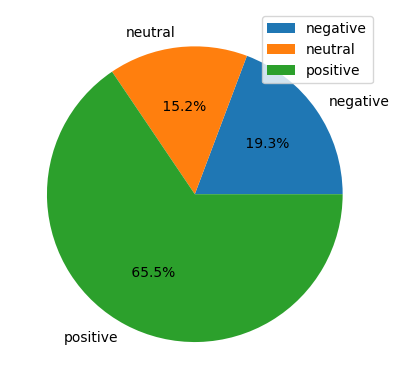

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['negative' , 'neutral', 'positive']
plt.pie(ulasan.groupby('Sentimen')['Sentimen'].count(), autopct=" %.1f%% " ,labels=labels)
plt.legend()
plt.show()

# case folding

In [65]:
def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
ulasan['CaseFolding']= ulasan['Ulasan'].apply(casefoldingText)

In [66]:
ulasan[['Ulasan','CaseFolding']].to_csv('casefolding.csv',index=False)

# Cleansing

In [67]:
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
ulasan['Cleaning']= ulasan['CaseFolding'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['HapusEmoji']= ulasan['Cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
ulasan['Cleansing']= ulasan['HapusEmoji'].apply(replaceTOM)
ulasan[['CaseFolding','Cleansing']].to_csv('cleansing.csv',index=False)

# tokenizing

In [68]:
nltk.download('punkt')
def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan
ulasan['Tokenizing']= ulasan['Cleansing'].apply(tokenizingText)
ulasan[['CaseFolding','Tokenizing']].to_csv('tokenizing.csv',index=False)
ulasan[['CaseFolding','Tokenizing']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,CaseFolding,Tokenizing
0,oo di,"[oo, di]"
1,bagus sih tapi tingkatkan lagi,"[bagus, sih, tapi, tingkatkan, lagi]"
2,lebih mudah lebih cepat dlm pelayanan,"[lebih, mudah, lebih, cepat, dlm, pelayanan]"
3,pilihannya keren,"[pilihannya, keren]"
4,terbaek,[terbaek]
...,...,...
976,mantap cepat dan terpercaya,"[mantap, cepat, dan, terpercaya]"
977,aplikasi sangat membantu pembelian tiket,"[aplikasi, sangat, membantu, pembelian, tiket]"
978,jam brp sekarang,"[jam, brp, sekarang]"
979,memudahkan pemesanan tiket bioskop,"[memudahkan, pemesanan, tiket, bioskop]"


## stemming

In [69]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

def stemming(kalimat_baru):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Lakukan stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) for word in kalimat_baru]
    return stemmed_words

ulasan['Stemming_list'] = ulasan['Tokenizing'].apply(stemming)

#merubah list ke str
ulasan['Stemming'] = ulasan['Stemming_list'].apply(' '.join)

#menampilkan data hasil stemming
ulasan[['Tokenizing','Stemming']]
ulasan[['Tokenizing','Stemming']].to_csv('stemming.csv', index=False)

## negasi

In [70]:
def handle_negation(kalimat_baru):
    negation_words = ["tidak", "bukan", "tak", "tiada", "jangan", "gak"]
    new_words = []
    prev_word_is_negation = False
    for word in kalimat_baru:
        if word in negation_words:
            new_words.append("tidak_")
            prev_word_is_negation = True
        elif prev_word_is_negation:
            new_words[-1] += word
            prev_word_is_negation = False
        else:
            new_words.append(word)
    return new_words
ulasan['negasi'] = ulasan['Stemming_list'].apply(handle_negation)
#menampilkan data hasil stemming
ulasan[['Stemming','negasi']]
ulasan[['Stemming','negasi']].to_csv('negasi.csv', index=False)

# normalizing

In [71]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
        filter_slang = pattern.sub(lambda x: kamusSlang[x.group()], kata.lower())
        if filter_slang.startswith('tidak_'):
          kata_depan = 'tidak_'
          kata_belakang = kata[6:]
          kata_belakang_slang = pattern.sub(lambda x: kamusSlang[x.group()], kata_belakang.lower())
          kata_hasil = kata_depan + kata_belakang_slang
          content.append(kata_hasil)
        else:
          content.append(filter_slang)
    ulasan = content
    return ulasan

ulasan['Formalisasi'] = ulasan['negasi'].apply(convertToSlangword)
ulasan[['negasi','Formalisasi']]
ulasan[['negasi','Formalisasi']].to_csv('normalization.csv', index=False)

# stopword removal

In [72]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mengunduh daftar stopword dari NLTK
daftar_stopword = stopwords.words('indonesian')

# Menambahkan stopword tambahan
daftar_stopword.extend(["yg", "dg", "rt", "dgn", "ny", "d",'gb','ahk','g'])

# Membaca file teks stopword menggunakan pandas
txt_stopword = pd.read_csv("stopwords.txt", names=["stopwords"], header=None)

# Menggabungkan daftar stopword dari NLTK dengan daftar stopword dari file teks
daftar_stopword.extend(txt_stopword['stopwords'].tolist())

# Mengubah daftar stopword menjadi set untuk pencarian yang lebih efisien
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
    cleaned_words = []
    for word in words:
        # Memisahkan kata dengan tambahan "tidak_"
        if word.startswith("tidak_"):
            cleaned_words.append(word[:5])
            cleaned_words.append(word[6:])
        elif word not in daftar_stopword:
            cleaned_words.append(word)
    return cleaned_words

ulasan['stopword_list'] = ulasan['Formalisasi'].apply(stopwordText)
ulasan['Stopword Removal'] = ulasan['stopword_list'].apply(' '.join)
ulasan[['Formalisasi','Stopword Removal']].to_csv('stopword.csv', index=False)
ulasan = ulasan[ulasan['Stopword Removal'].astype(bool)]
ulasan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
ulasan = ulasan[ulasan['Stopword Removal'].astype(bool)]
ulasan

,No,Username,Score,At,Ulasan,Sentimen,CaseFolding,Cleaning,HapusEmoji,Cleansing,Tokenizing,Stemming_list,Stemming,negasi,Formalisasi,stopword_list,Stopword Removal
0,1,Hapix Putra,5,Tue 31 Jan 2023 12:45:23 GMT,oo di,positive,oo di,oo di,oo di,oo di,"[oo, di]","[oo, di]",oo di,"[oo, di]","[oo, di]",[oo],oo
1,2,Grace Cipto,5,Tue 31 Jan 2023 04:52:03 GMT,bagus sih tapi tingkatkan lagi,positive,bagus sih tapi tingkatkan lagi,bagus sih tapi tingkatkan lagi,bagus sih tapi tingkatkan lagi,bagus sih tapi tingkatkan lagi,"[bagus, sih, tapi, tingkatkan, lagi]","[bagus, sih, tapi, tingkat, lagi]",bagus sih tapi tingkat lagi,"[bagus, sih, tapi, tingkat, lagi]","[bagus, sih, tapi, tingkat, lagi]","[bagus, sih, tingkat]",bagus sih tingkat
2,3,Ema Akmaliah,5,Mon 30 Jan 2023 22:52:38 GMT,lebih mudah lebih cepat dlm pelayanan,positive,lebih mudah lebih cepat dlm pelayanan,lebih mudah lebih cepat dlm pelayanan,lebih mudah lebih cepat dlm pelayanan,lebih mudah lebih cepat dlm pelayanan,"[lebih, mudah, lebih, cepat, dlm, pelayanan]","[lebih, mudah, lebih, cepat, dlm, layan]",lebih mudah lebih cepat dlm layan,"[lebih, mudah, lebih, cepat, dlm, layan]","[lebih, mudah, lebih, cepat, dlm, layan]","[mudah, cepat, dlm, layan]",mudah cepat dlm layan
3,4,Prasetyo Utomo,5,Mon 30 Jan 2023 13:00:54 GMT,pilihannya keren,positive,pilihannya keren,pilihannya keren,pilihannya keren,pilihannya keren,"[pilihannya, keren]","[pilih, keren]",pilih keren,"[pilih, keren]","[pilih, keren]","[pilih, keren]",pilih keren
4,5,Bayu Iryanto,5,Mon 30 Jan 2023 09:38:02 GMT,terbaek,positive,terbaek,terbaek,terbaek,terbaek,[terbaek],[terbaek],terbaek,[terbaek],[terbaek],[terbaek],terbaek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,996,Yebee Glory christiant,5,Fri 14 Oct 2022 09:13:09 GMT,mantap cepat dan terpercaya,positive,mantap cepat dan terpercaya,mantap cepat dan terpercaya,mantap cepat dan terpercaya,mantap cepat dan terpercaya,"[mantap, cepat, dan, terpercaya]","[mantap, cepat, dan, percaya]",mantap cepat dan percaya,"[mantap, cepat, dan, percaya]","[mantap, cepat, dan, percaya]","[mantap, cepat, percaya]",mantap cepat percaya
977,997,Danny Purba,5,Thu 13 Oct 2022 18:50:40 GMT,aplikasi sangat membantu pembelian tiket,neutral,aplikasi sangat membantu pembelian tiket,aplikasi sangat membantu pembelian tiket,aplikasi sangat membantu pembelian tiket,aplikasi sangat membantu pembelian tiket,"[aplikasi, sangat, membantu, pembelian, tiket]","[aplikasi, sangat, bantu, beli, tiket]",aplikasi sangat bantu beli tiket,"[aplikasi, sangat, bantu, beli, tiket]","[aplikasi, sangat, bantu, beli, tiket]","[aplikasi, bantu, beli, tiket]",aplikasi bantu beli tiket
978,998,Nabil Syujazaidan,4,Thu 13 Oct 2022 16:51:45 GMT,jam brp sekarang,neutral,jam brp sekarang,jam brp sekarang,jam brp sekarang,jam brp sekarang,"[jam, brp, sekarang]","[jam, brp, sekarang]",jam brp sekarang,"[jam, brp, sekarang]","[jam, berapa, sekarang]",[jam],jam
979,999,dewa pandhu,5,Thu 13 Oct 2022 15:36:20 GMT,memudahkan pemesanan tiket bioskop,positive,memudahkan pemesanan tiket bioskop,memudahkan pemesanan tiket bioskop,memudahkan pemesanan tiket bioskop,memudahkan pemesanan tiket bioskop,"[memudahkan, pemesanan, tiket, bioskop]","[mudah, mesan, tiket, bioskop]",mudah mesan tiket bioskop,"[mudah, mesan, tiket, bioskop]","[mudah, mesan, tiket, bioskop]","[mudah, mesan, tiket, bioskop]",mudah mesan tiket bioskop


In [74]:
ulasan.to_csv('data_bersih.csv',index=False)

# pembobotan tf-idf

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = ulasan['Stopword Removal']
Y = ulasan['Sentimen']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)


# Create CountVectorizer instance
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)

# Create TfidfTransformer instance
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

# Create TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_vectorized = tfidf_vectorizer.fit_transform(X)

# mengambil kata asli from CountVectorizer or TfidfVectorizer
feature_names = count_vectorizer.get_feature_names_out()  # or tfidf_vectorizer.get_feature_names()

# Create a dictionary to store the results
results = {"Ulasan": [], "Term": [], "TF": [], "IDF": [], "TF-IDF": []}

# Loop over the documents
for i in range(len(X)):
    # Add the document to the results dictionary
    results["Ulasan"].extend([f" ulasan{i+1}"] * len(feature_names))
    # Add the feature names to the results dictionary
    results["Term"].extend(feature_names)
    # Calculate the TF, IDF, and TF-IDF for each feature in the document
    for j, feature in enumerate(feature_names):
        tf = X_count[i, j]
        idf = tfidf_transformer.idf_[j]  # or X_tfidf_vectorized.idf_[j]
        tf_idf_score = X_tfidf[i, j]  # or X_tfidf_vectorized[i, j]
        # Add the results to the dictionary
        results["TF"].append(tf)
        results["IDF"].append(idf)
        results["TF-IDF"].append(tf_idf_score)
# Convert the results dictionary to a Pandas dataframe
df = pd.DataFrame(results)


# Save the results to a CSV file
df.to_csv("tf_idf_results.csv", index=False)

#filter nilai term
newdf = df[(df.TF != 0 )]

# Save the results to a CSV file
newdf.to_csv("hasil TF IDF.csv", index=False)

## percobaan nilai k sebelum smote

In [76]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Membuat dataframe kosong untuk menyimpan hasil
results = pd.DataFrame(columns=['K', 'Akurasi', 'Presisi', 'Recall'])
# Nilai k yang diinginkan
k_values = [3,5,7,9,10]

# Loop melalui nilai k yang diinginkan
for k in k_values:

    # Melatih model KNN dengan nilai k
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)

    # Memprediksi label pada data uji
    y_pred = classifier.predict(x_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil ke dalam dataframe
    results = results.append({'K': k, 'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall}, ignore_index=True)

# Menampilkan tabel hasil
print(results)
results.to_csv('pengujianK_KNN.csv',index=False)

      K   Akurasi   Presisi    Recall
0   3.0  0.724490  0.720226  0.724490
1   5.0  0.704082  0.717053  0.704082
2   7.0  0.724490  0.733584  0.724490
3   9.0  0.729592  0.739020  0.729592
4  10.0  0.734694  0.731639  0.734694


## knn sebelum smote

              precision    recall  f1-score   support

           0       0.52      0.60      0.56        42
           1       0.42      0.32      0.36        25
           2       0.86      0.86      0.86       129

    accuracy                           0.73       196
   macro avg       0.60      0.59      0.59       196
weighted avg       0.73      0.73      0.73       196



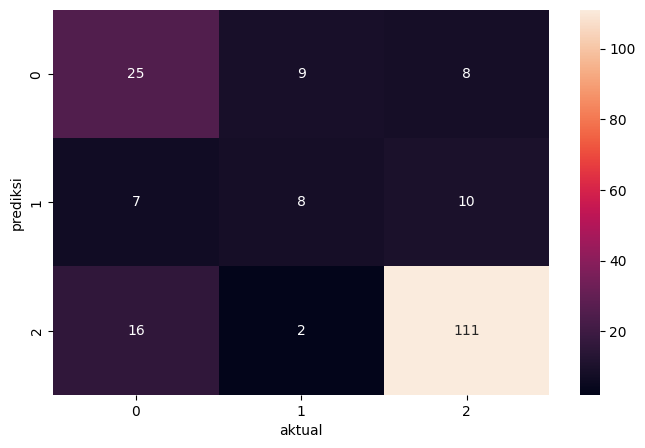

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=10)
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(x_train, y_train)
# Menentukan hasil prediksi dari x_test
y_pred = klasifikasi.predict(x_test)
y_pred
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(x_test)
print(classification_report(y_test, y_pred))

#https://medium.com/@16611130/klasifikasi-menggunakan-metode-knn-k-nearest-neighbor-dalam-python-a40e79a74101

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("aktual")
plt.ylabel("prediksi")
plt.show()

# smote

In [78]:
x_smote =vectorizer.fit_transform(ulasan['Stemming'])
y_smote =ulasan['Sentimen']

from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Dataset sebelum SMOTE : {Counter(Y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x_smote, y_smote)

print(f'Dataset sesudah SMOTE : {Counter(y_res)}')

Dataset sebelum SMOTE : Counter({'positive': 639, 'negative': 189, 'neutral': 149})
Dataset sesudah SMOTE : Counter({'positive': 639, 'negative': 639, 'neutral': 639})


In [79]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.20)

In [80]:
#menyimpan data hasil SMOTE
df = pd.DataFrame(X_res)
df.rename(columns={0:'term'}, inplace=True)
df['sentimen'] = y_res
# mengembalikan kalimat asli dari tfidf
feature_names = vectorizer.get_feature_names_out()
kalimat_asli = []
for index, row in df.iterrows():
    vektor_ulasan = X_res[index]
    kata_kunci = [feature_names[i] for i in vektor_ulasan.indices]
    kalimat_asli.append(' '.join(kata_kunci))

# tambahkan kolom baru dengan kalimat asli ke dalam data frame
df['kalimat_asli'] = kalimat_asli
df.to_csv('data_smote.csv', index=False)
#mengambil data sintetik
df_sintetik = df.iloc[1000:]
#menyimpan dalam bentuk csv
df_sintetik.to_csv('data_sintetik.csv', index=False)

## percobaan nilai k setelah smote

In [86]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Membuat dataframe kosong untuk menyimpan hasil
results = pd.DataFrame(columns=['K', 'Akurasi', 'Presisi', 'Recall'])
# Nilai k yang diinginkan
k_values = [3,5,7,9,10]

# Loop melalui nilai k yang diinginkan
for k in k_values:

    # Melatih model KNN dengan nilai k
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, Y_train)

    # Memprediksi label pada data uji
    y_pred = classifier.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')

    # Menyimpan hasil ke dalam dataframe
    results = results.append({'K': k, 'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall}, ignore_index=True)

# Menampilkan tabel hasil
print(results)
results.to_csv('pengujiank_SMOTEKNN.csv',index=False)

      K   Akurasi   Presisi    Recall
0   3.0  0.898438  0.909399  0.898438
1   5.0  0.872396  0.888044  0.872396
2   7.0  0.867188  0.885306  0.867188
3   9.0  0.854167  0.875640  0.854167
4  10.0  0.856771  0.877849  0.856771


## KNN SMOTE

              precision    recall  f1-score   support

    negative       0.88      0.97      0.93       118
     neutral       0.86      0.99      0.92       137
    positive       0.99      0.73      0.84       129

    accuracy                           0.90       384
   macro avg       0.91      0.90      0.90       384
weighted avg       0.91      0.90      0.89       384



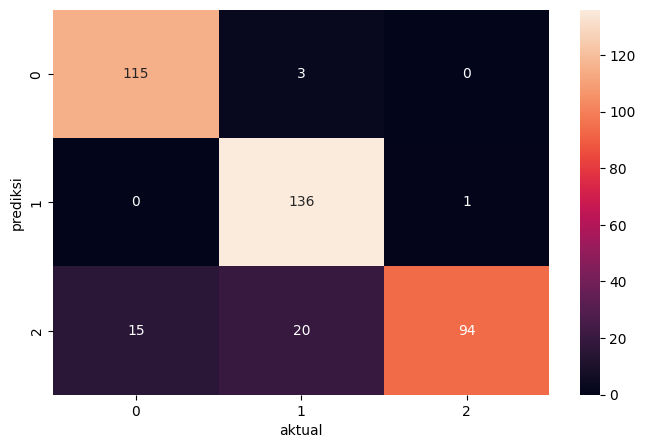

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# Mengaktifkan fungsi klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=3)
# Memasukkan data training pada fungsi klasifikasi
klasifikasi.fit(X_train, Y_train)
# Menentukan hasil prediksi dari x_test
y_pred = klasifikasi.predict(X_test)
y_pred
# Menentukan probabilitas hasil prediksi
klasifikasi.predict_proba(X_test)
print(classification_report(Y_test, y_pred))

#https://medium.com/@16611130/klasifikasi-menggunakan-metode-knn-k-nearest-neighbor-dalam-python-a40e79a74101
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("aktual")
plt.ylabel("prediksi")
plt.show()

## membuat plot

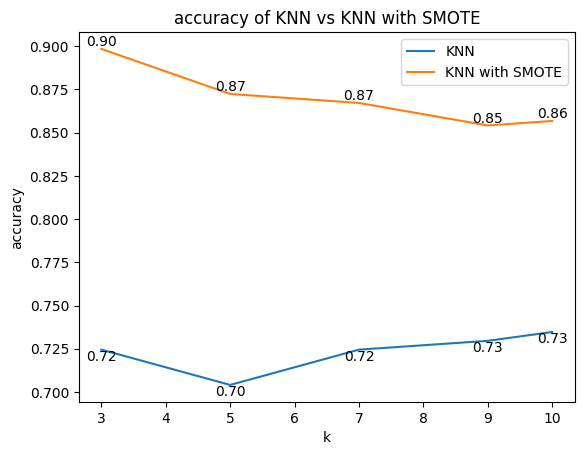

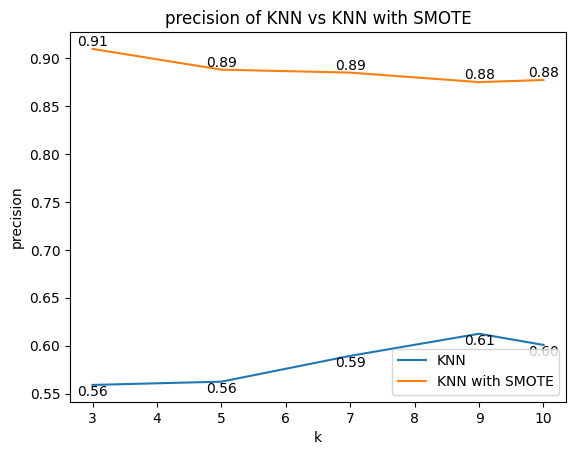

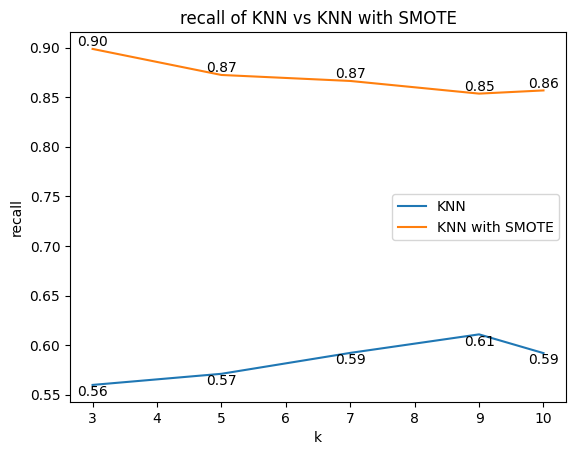

In [85]:
# membuat plot perbandingan klasifikasi report knn dengan knn smote
k_values = [3,5,7,9,10]
# Initialize lists to store accuracy scores
knn_scores = []
knn_precision = []
knn_recall = []

smote_scores = []
smote_precision = []
smote_recall = []

# Iterate through different k values
for k in k_values:
    # KNN without SMOTE
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test, y_pred_knn))
    knn_precision.append(precision_score(y_test, y_pred_knn,average='macro'))
    knn_recall.append(recall_score(y_test, y_pred_knn,average='macro'))
    # KNN with SMOTE
    knn_smote = KNeighborsClassifier(n_neighbors=k)
    knn_smote.fit(X_train, Y_train)
    y_pred_smote = knn_smote.predict(X_test)
    smote_scores.append(accuracy_score(Y_test, y_pred_smote))
    smote_precision.append(precision_score(Y_test, y_pred_smote,average='macro'))
    smote_recall.append(recall_score(Y_test, y_pred_smote,average='macro'))

# Plot the akurasi scores
plt.plot(k_values, knn_scores, label='KNN')
plt.plot(k_values, smote_scores, label='KNN with SMOTE')

# Menampilkan titik nilai pada plot
for i, j in zip(k_values, smote_scores):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

for i, j in zip(k_values, knn_scores):
    plt.text(i, j, f'{j:.2f}', ha='center', va='top')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy of KNN vs KNN with SMOTE')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

# Plot the precision scores
plt.plot(k_values, knn_precision, label='KNN')
plt.plot(k_values, smote_precision, label='KNN with SMOTE')

# Menampilkan titik nilai pada plot
for i, j in zip(k_values, smote_precision):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

for i, j in zip(k_values, knn_precision):
    plt.text(i, j, f'{j:.2f}', ha='center', va='top')
plt.xlabel('k')
plt.ylabel('precision')
plt.title('precision of KNN vs KNN with SMOTE')
plt.legend()
plt.savefig('precision.png')
plt.show()

# Plot the recall scores
plt.plot(k_values, knn_recall, label='KNN')
plt.plot(k_values, smote_recall, label='KNN with SMOTE')

# Menampilkan titik nilai pada plot
for i, j in zip(k_values, smote_recall):
    plt.text(i, j, f'{j:.2f}', ha='center', va='bottom')

for i, j in zip(k_values, knn_recall):
    plt.text(i, j, f'{j:.2f}', ha='center', va='top')
plt.xlabel('k')
plt.ylabel('recall')
plt.title('recall of KNN vs KNN with SMOTE')
plt.legend()
plt.savefig('recall.png')
plt.show()